In [12]:
import numpy as np

In [13]:
## Other model

In [14]:
import tensorflow as tf
from tensorflow import keras


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [16]:
X_train_full.shape

(60000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[1]]


'T-shirt/top'

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# OR like this

In [30]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])


In [25]:
history = model.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7226 - accuracy: 0.7543 - val_loss: 0.5075 - val_accuracy: 0.8272
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4776 - accuracy: 0.8318 - val_loss: 0.4674 - val_accuracy: 0.8380
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4290 - accuracy: 0.8483 - val_loss: 0.4060 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3999 - accuracy: 0.8569 - val_loss: 0.3897 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3775 - accuracy: 0.8653 - val_loss: 0.3695 - val_accuracy: 0.8712
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3598 - accuracy: 0.8711 - val_loss: 0.3489 - val_accuracy: 0.8788
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3459 - accuracy: 0.8749 - val_loss: 0.3449 - val_accuracy:

In [26]:
import pandas as pd

In [27]:
import numpy as np

In [32]:
import matplotlib.pyplot as plt

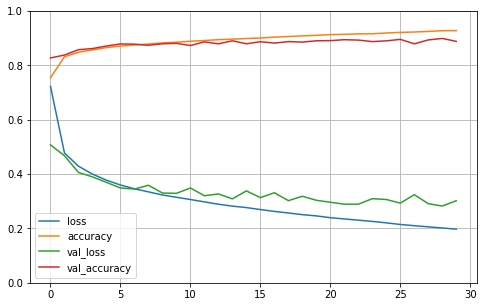

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 66.7656 - accuracy: 0.8402


[66.76558685302734, 0.8402000069618225]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [37]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)